In [1846]:
%matplotlib inline
import glob
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from astropy.table import Table
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.exceptions import AstropyWarning
import warnings
    
np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

In [1865]:
#This cell will read in my catalog
file = 'catalogs/galaxy_w_ampli.cat'
cat = Table.read(file, format='ascii')

#cat['id'] = 1131
cat.show_in_notebook()

idx,cluster,id,obj,RA,DEC,area,z_clash,f225w_mag,f225w_magerr,f275w_mag,f275w_magerr,f336w_mag,f336w_magerr,f390w_mag,f390w_magerr,f435w_mag,f435w_magerr,f475w_mag,f475w_magerr,f606w_mag,f606w_magerr,f625w_mag,f625w_magerr,f775w_mag,f775w_magerr,f814w_mag,f814w_magerr,f850lp_mag,f850lp_magerr,f105w_mag,f105w_magerr,f110w_mag,f110w_magerr,f125w_mag,f125w_magerr,f140w_mag,f140w_magerr,f160w_mag,f160w_magerr,f225w_flux,f225w_fluxerr,f275w_flux,f275w_fluxerr,f336w_flux,f336w_fluxerr,f390w_flux,f390w_fluxerr,f435w_flux,f435w_fluxerr,f475w_flux,f475w_fluxerr,f606w_flux,f606w_fluxerr,f625w_flux,f625w_fluxerr,f775w_flux,f775w_fluxerr,f814w_flux,f814w_fluxerr,f850lp_flux,f850lp_fluxerr,f105w_flux,f105w_fluxerr,f110w_flux,f110w_fluxerr,f125w_flux,f125w_fluxerr,f140w_flux,f140w_fluxerr,f160w_flux,f160w_fluxerr,z_phot,z_eazy,z_conner,z_160,z_500,z_840,z_spec,AMP_160,AMP_best,AMP_840,spec,ra_sexagesimal,dec_sexagesimal
0,a209,218,-1,22.9730375,-13.5973175,-99,0.939,21.022,0.025,-99.0,-99.0,22.711,0.068,24.107,0.13,24.274,0.114,24.094,0.068,23.743,0.033,23.941,0.068,22.948,0.034,22.67,0.02,22.769,0.06,22.679,0.015,22.58,0.008,22.393,0.012,22.3,0.009,22.298,0.014,11.658950755111643,0.2684572620867175,-99,-99,2.4607045253227318,0.15411469838497427,0.6802357739038563,0.08144763914103895,0.5832563395479197,0.06124067928938149,0.6884294934431013,0.04311655570568315,0.9511728993350307,0.028910066313067737,0.7926098551086965,0.049641404524589997,1.978151127609877,0.061946113654484575,2.555403397916163,0.04707227016502472,2.3327031076706697,0.12890993765048084,2.534308428464574,0.03501276485059017,2.7762557301742445,0.02045620818764325,3.2980669535123086,0.036451583053697896,3.5930186207931945,0.02978363201431837,3.599643305372007,0.04641551608425423,0.8484974503517151,0.8485,0.903,0.8220999836921692,0.8637999892234802,0.8999999761581421,0.849,1.2121,1.2149,1.2196,0.0,01:31:53.529,-13:35:50.34
1,a209,1020,-1,22.978324999999998,-13.612234166666667,-99,0.488,-99.0,-99.0,-99.0,-99.0,21.628,0.032,22.892,0.055,22.664,0.034,22.573,0.022,21.845,0.007,21.672,0.011,21.32,0.01,21.218,0.007,21.196,0.018,21.105,0.005,21.089,0.003,21.036,0.004,20.947,0.003,20.869,0.005,-99.0,-99.0,-99,-99,5.146261713318115,0.1516762304733733,1.6065412033911464,0.08138235217660174,1.9819462325237491,0.062064957961698586,2.1552212899503393,0.04367070764621884,4.21397416292241,0.027168495451460172,4.941876278501204,0.050067998861310165,6.8342658474372,0.06294591464746886,7.507439974497515,0.04840225424111162,7.661113006115623,0.1270106251460974,8.330898984313382,0.038365207625038464,8.454576701606127,0.023360858736831646,8.877524274432314,0.03270600809120101,9.635890774307972,0.026624950145568465,10.35361158671572,0.0476801433964441,0.5941091179847717,0.5941,0.539,0.5184000134468079,0.5781000256538391,0.6047999858856201,0.594,1.4997,1.5751,1.5759,0.0,01:31:54.798,-13:36:44.04
2,a209,1312,-1,22.97045,-13.616914166666668,-99,0.495,-99.0,-99.0,-99.0,-99.0,21.793,0.036,22.677,0.042,22.647,0.031,22.343,0.016,21.631,0.006,21.464,0.008,21.116,0.008,21.062,0.006,21.001,0.014,20.965,0.004,20.951,0.002,20.896,0.004,20.831,0.003,20.775,0.004,-99.0,-99.0,-99,-99,3.476314426375093,0.11526494078493268,1.539994077761927,0.0595722524334626,1.5831390109575105,0.04520187235592445,2.094686581820893,0.030868442225890826,4.035701634498586,0.02230211141608356,4.706727451459888,0.03468044949285567,6.4851354413272775,0.047784243818392164,6.815834723247345,0.03766569463214529,7.209730825841829,0.09296570485486506,7.452792858607061,0.02745710357984176,7.549514971501572,0.01390672050617191,7.941801915877265,0.02925867952481687,8.431775810239225,0.02329785754574956,8.878079930299165,0.03270805520306636,0.5900025367736816,0.59,0.493,0.5684999823570251,0.588699996471405,0.6055999994277954,0.579,1.9849,1.9849,1.9849,1.0,01:31:52.908,-13:37:00.89
3,a209,1602,-1,22.96975,-13.621598888888888,-99,0.547,-99.0,-99.0,-99.0,-99.0,22.891,0.087,23.128,0.057,23.884,0.086,22.976,0.026,22.402,0.01,22.288,0.016,22.081,0.016,

In [1848]:
cluster  = 'macs1720'
ID       = 1827
z160     = '0.517' #Since these are used for file names, they need to be strings
z_best   = '0.554'
z840     = '0.580'
spec     = 0       # 0 = no spec z, 1 = has spec z

if spec:
    path_160  = '/Volumes/Home_Drive/Amplification_Maps/%s/ampli_%s_%s_zspec_%s.fits'%(cluster,cluster,ID,z160)
    path_best = '/Volumes/Home_Drive/Amplification_Maps/%s/ampli_%s_%s_zspec_%s.fits'%(cluster,cluster,ID,z_best)
    path_840  = '/Volumes/Home_Drive/Amplification_Maps/%s/ampli_%s_%s_zspec_%s.fits'%(cluster,cluster,ID,z840)
    
else:
    path_160  = '/Volumes/Home_Drive/Amplification_Maps/%s/ampli_%s_%s_%s.fits'%(cluster,cluster,ID,z160)
    path_best = '/Volumes/Home_Drive/Amplification_Maps/%s/ampli_%s_%s_%s.fits'%(cluster,cluster,ID,z_best)
    path_840  = '/Volumes/Home_Drive/Amplification_Maps/%s/ampli_%s_%s_%s.fits'%(cluster,cluster,ID,z840)

Text(0.5, 1.0, 'AMP_840')

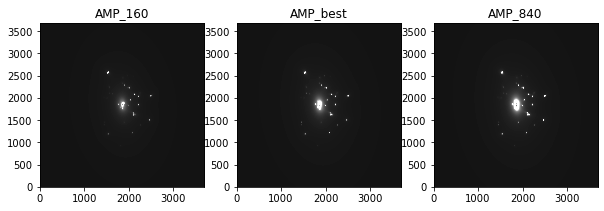

In [1849]:
#This cell will open the amplification maps

pf_160   = fits.open(path_160)
head_160 = pf_160[0].header
data_160 = pf_160[0].data
wcs_160  = WCS(path_160)
pw_160   = WCS(header=head_160)

pf_best   = fits.open(path_best)
head_best = pf_best[0].header
data_best = pf_best[0].data
wcs_best  = WCS(path_best)
pw_best   = WCS(header=head_best)

pf_840   = fits.open(path_840)
head_840 = pf_840[0].header
data_840 = pf_840[0].data
wcs_840  = WCS(path_840)
pw_840   = WCS(header=head_840)

fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=False)
axs[0].imshow(data_160,origin='lower',cmap='Greys_r',vmin=0,vmax=15)
axs[1].imshow(data_best,origin='lower',cmap='Greys_r',vmin=0,vmax=15)
axs[2].imshow(data_840,origin='lower',cmap='Greys_r',vmin=0,vmax=15)
axs[0].set_title('AMP_160')
axs[1].set_title('AMP_best')
axs[2].set_title('AMP_840')

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

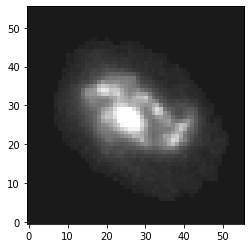

In [1850]:
#This cell loads in the segmented image of the galaxy
segment  = '/Users/brianmerino/Desktop/Apperture_Test/%s-%s/masked/galaxy_f814w.fits'%(cluster,ID)
#segment  = '/Users/brianmerino/Desktop/Apperture_Test/%s-%s/masked/galaxy_f775w.fits'%(cluster,ID)
seg      = fits.open(segment)

head_seg = seg[0].header
data_seg = seg[0].data
wcs_seg  = WCS(segment)
segw     = WCS(header=head_seg)

plt.imshow(data_seg,origin='lower',cmap='Greys_r',vmin=-0.1,vmax=1)

length = head_seg['NAXIS1']/2
print(length)

In [1851]:
cat[126]

cluster,id,obj,RA,DEC,area,z_clash,f225w_mag,f225w_magerr,f275w_mag,f275w_magerr,f336w_mag,f336w_magerr,f390w_mag,f390w_magerr,f435w_mag,f435w_magerr,f475w_mag,f475w_magerr,f606w_mag,f606w_magerr,f625w_mag,f625w_magerr,f775w_mag,f775w_magerr,f814w_mag,f814w_magerr,f850lp_mag,f850lp_magerr,f105w_mag,f105w_magerr,f110w_mag,f110w_magerr,f125w_mag,f125w_magerr,f140w_mag,f140w_magerr,f160w_mag,f160w_magerr,f225w_flux,f225w_fluxerr,f275w_flux,f275w_fluxerr,f336w_flux,f336w_fluxerr,f390w_flux,f390w_fluxerr,f435w_flux,f435w_fluxerr,f475w_flux,f475w_fluxerr,f606w_flux,f606w_fluxerr,f625w_flux,f625w_fluxerr,f775w_flux,f775w_fluxerr,f814w_flux,f814w_fluxerr,f850lp_flux,f850lp_fluxerr,f105w_flux,f105w_fluxerr,f110w_flux,f110w_fluxerr,f125w_flux,f125w_fluxerr,f140w_flux,f140w_fluxerr,f160w_flux,f160w_fluxerr,z_phot,z_eazy,z_conner,z_160,z_500,z_840,z_spec,AMP_160,AMP_best,AMP_840,spec,ra_sexagesimal,dec_sexagesimal
str8,int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str12,str12
macs2129,282,-1,322.374625,-7.676721388888889,-99,0.883,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,23.592,0.058,23.651,0.042,23.399,0.022,23.337,0.036,22.778,0.027,22.798,0.021,22.556,0.047,22.581,0.013,22.518,0.007,22.505,0.012,22.505,0.01,22.525,0.016,-99.0,-99.0,-99,-99,-99.0,-99.0,-99.0,-99.0,-0.013281387001137415,-0.0007094913503760107,-0.0125789222167342,-0.0004865958515406876,-0.015865122567041694,-0.000321470993548264,-0.016797452885169345,-0.0005569569304367149,-0.028108872890633047,-0.0006990091743474299,-0.027595828140989206,-0.0005337506370526457,-0.034486048260088276,-0.0014928527400311074,-0.033701049963436674,-0.0004035175833730955,-0.03571440602143665,-0.0002302592849482711,-0.03614460072403372,-0.00039948489033303286,-0.03614460072403372,-0.00033290407527752734,-0.035484887412098765,-0.0005229246258026924,0.8487008810043335,0.8487,0.812,2.9679999351501465,2.9707000255584717,2.973400115966797,0.849,1.2914,1.3034,1.3328,0.0,21:29:29.91,-07:40:36.19


115
260.05677083333336 35.59430305555556


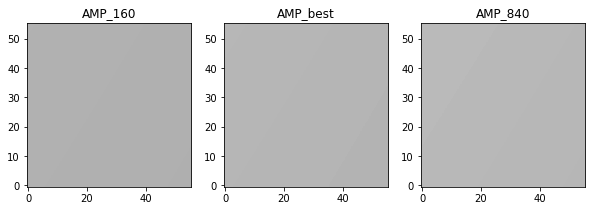

In [1852]:
#This cell will create subimages of the amplification maps
for i in range(0,len(cat)):
    if cat['cluster'][i] == cluster and cat['id'][i] == ID:
        ra  = cat['RA'][i]
        dec = cat['DEC'][i]
        print(i)

obj      = [[ra, dec]]        
pixobjs  = pw_160.wcs_world2pix(obj,1)
        
x1 = int(round(pixobjs[0][0] - (length)))
x2 = int(round(pixobjs[0][0] + (length)))
y1 = int(round(pixobjs[0][1] - (length)))
y2 = int(round(pixobjs[0][1] + (length)))
    
subimg_160  = data_160[y1:y2,x1:x2]
subimg_best = data_best[y1:y2,x1:x2]
subimg_840  = data_840[y1:y2,x1:x2]

fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=False)
axs[0].imshow(subimg_160,origin ='lower',vmin=-0.1,vmax=2,cmap='Greys_r')
axs[1].imshow(subimg_best,origin='lower',vmin=-0.1,vmax=2,cmap='Greys_r')
axs[2].imshow(subimg_840,origin ='lower',vmin=-0.1,vmax=2,cmap='Greys_r')
axs[0].set_title('AMP_160')
axs[1].set_title('AMP_best')
axs[2].set_title('AMP_840')

print(ra,dec)

Number of pixels: 1325


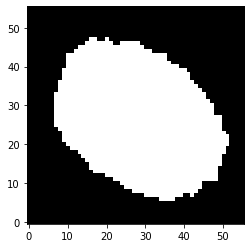

In [1853]:
#This cell creates a binary mask based off of the segmented image
test = data_seg
num_pixel = 0
for n in range(0,len(data_seg)):
    for m in range(0,len(data_seg)-1):
        if data_seg[n][m] != 0:
            test[n][m]=1
            num_pixel+=1
        else:
            test[n][m]=0
            
plt.imshow(test,origin='lower',cmap='Greys_r',vmin=0,vmax=0.01)
print('Number of pixels: %s'%(str(num_pixel)))

In [1854]:
#data_seg = data_seg[0:98,0:98]
#test = test[0:98,0:98]

Text(0.5, 1.0, 'AMP_840')

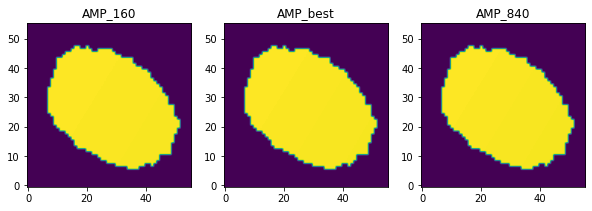

In [1855]:
#This cell mutiplies the mask with the amplitication map
AMP_160 = test*subimg_160
AMP_best = test*subimg_best
AMP_840 = test*subimg_840

fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=False)
axs[0].imshow(AMP_160,origin='lower')
axs[1].imshow(AMP_best,origin='lower')
axs[2].imshow(AMP_840,origin='lower')
axs[0].set_title('AMP_160')
axs[1].set_title('AMP_best')
axs[2].set_title('AMP_840')

In [1856]:
SUM_160 = np.sum(AMP_160)
SUM_best = np.sum(AMP_best)
SUM_840 = np.sum(AMP_840)

AMP_Value_160 = SUM_160/num_pixel
AMP_Value_best = SUM_best/num_pixel
AMP_Value_840 = SUM_840/num_pixel

print('Flux amplification value: %4s'%(round(AMP_Value_160,4)))
print('Flux amplification value: %4s'%(round(AMP_Value_best,4)))
print('Flux amplification value: %4s'%(round(AMP_Value_840,4)))

Flux amplification value: 1.1293
Flux amplification value: 1.1609
Flux amplification value: 1.1818


In [1857]:
#cat.remove_column('col80')
#cat.add_column(0,name='spec',index=-1)
#cat.add_column(-99.99,name='AMP_best',index=-2)
#cat.write('/Users/brianmerino/EAZY/catalogs/galaxy_w_ampli.cat', overwrite=True,format='ascii')
spec

0

In [1858]:
for j in range(0,len(cat)):
    if cat['cluster'][j] == cluster and cat['id'][j] == ID:
        cat['AMP_160'][j]  = round(AMP_Value_160,4)
        cat['AMP_best'][j] = round(AMP_Value_best,4)
        cat['AMP_840'][j]  = round(AMP_Value_840,4)
        cat['z_spec'][j]   = z_best
        cat['spec'][j]     = spec

In [1859]:
cat.show_in_notebook()

idx,cluster,id,obj,RA,DEC,area,z_clash,f225w_mag,f225w_magerr,f275w_mag,f275w_magerr,f336w_mag,f336w_magerr,f390w_mag,f390w_magerr,f435w_mag,f435w_magerr,f475w_mag,f475w_magerr,f606w_mag,f606w_magerr,f625w_mag,f625w_magerr,f775w_mag,f775w_magerr,f814w_mag,f814w_magerr,f850lp_mag,f850lp_magerr,f105w_mag,f105w_magerr,f110w_mag,f110w_magerr,f125w_mag,f125w_magerr,f140w_mag,f140w_magerr,f160w_mag,f160w_magerr,f225w_flux,f225w_fluxerr,f275w_flux,f275w_fluxerr,f336w_flux,f336w_fluxerr,f390w_flux,f390w_fluxerr,f435w_flux,f435w_fluxerr,f475w_flux,f475w_fluxerr,f606w_flux,f606w_fluxerr,f625w_flux,f625w_fluxerr,f775w_flux,f775w_fluxerr,f814w_flux,f814w_fluxerr,f850lp_flux,f850lp_fluxerr,f105w_flux,f105w_fluxerr,f110w_flux,f110w_fluxerr,f125w_flux,f125w_fluxerr,f140w_flux,f140w_fluxerr,f160w_flux,f160w_fluxerr,z_phot,z_eazy,z_conner,z_160,z_500,z_840,z_spec,AMP_160,AMP_best,AMP_840,spec,ra_sexagesimal,dec_sexagesimal
0,a209,218,-1,22.9730375,-13.5973175,-99,0.939,21.022,0.025,-99.0,-99.0,22.711,0.068,24.107,0.13,24.274,0.114,24.094,0.068,23.743,0.033,23.941,0.068,22.948,0.034,22.67,0.02,22.769,0.06,22.679,0.015,22.58,0.008,22.393,0.012,22.3,0.009,22.298,0.014,11.658950755111643,0.2684572620867175,-99,-99,2.4607045253227318,0.15411469838497427,0.6802357739038563,0.08144763914103895,0.5832563395479197,0.06124067928938149,0.6884294934431013,0.04311655570568315,0.9511728993350307,0.028910066313067737,0.7926098551086965,0.049641404524589997,1.978151127609877,0.061946113654484575,2.555403397916163,0.04707227016502472,2.3327031076706697,0.12890993765048084,2.534308428464574,0.03501276485059017,2.7762557301742445,0.02045620818764325,3.2980669535123086,0.036451583053697896,3.5930186207931945,0.02978363201431837,3.599643305372007,0.04641551608425423,0.8484974503517151,0.8485,0.903,0.8220999836921692,0.8637999892234802,0.8999999761581421,0.849,1.2121,1.2149,1.2196,0.0,01:31:53.529,-13:35:50.34
1,a209,1020,-1,22.978324999999998,-13.612234166666667,-99,0.488,-99.0,-99.0,-99.0,-99.0,21.628,0.032,22.892,0.055,22.664,0.034,22.573,0.022,21.845,0.007,21.672,0.011,21.32,0.01,21.218,0.007,21.196,0.018,21.105,0.005,21.089,0.003,21.036,0.004,20.947,0.003,20.869,0.005,-99.0,-99.0,-99,-99,5.146261713318115,0.1516762304733733,1.6065412033911464,0.08138235217660174,1.9819462325237491,0.062064957961698586,2.1552212899503393,0.04367070764621884,4.21397416292241,0.027168495451460172,4.941876278501204,0.050067998861310165,6.8342658474372,0.06294591464746886,7.507439974497515,0.04840225424111162,7.661113006115623,0.1270106251460974,8.330898984313382,0.038365207625038464,8.454576701606127,0.023360858736831646,8.877524274432314,0.03270600809120101,9.635890774307972,0.026624950145568465,10.35361158671572,0.0476801433964441,0.5941091179847717,0.5941,0.539,0.5184000134468079,0.5781000256538391,0.6047999858856201,0.594,1.4997,1.5751,1.5759,0.0,01:31:54.798,-13:36:44.04
2,a209,1312,-1,22.97045,-13.616914166666668,-99,0.495,-99.0,-99.0,-99.0,-99.0,21.793,0.036,22.677,0.042,22.647,0.031,22.343,0.016,21.631,0.006,21.464,0.008,21.116,0.008,21.062,0.006,21.001,0.014,20.965,0.004,20.951,0.002,20.896,0.004,20.831,0.003,20.775,0.004,-99.0,-99.0,-99,-99,3.476314426375093,0.11526494078493268,1.539994077761927,0.0595722524334626,1.5831390109575105,0.04520187235592445,2.094686581820893,0.030868442225890826,4.035701634498586,0.02230211141608356,4.706727451459888,0.03468044949285567,6.4851354413272775,0.047784243818392164,6.815834723247345,0.03766569463214529,7.209730825841829,0.09296570485486506,7.452792858607061,0.02745710357984176,7.549514971501572,0.01390672050617191,7.941801915877265,0.02925867952481687,8.431775810239225,0.02329785754574956,8.878079930299165,0.03270805520306636,0.5900025367736816,0.59,0.493,0.5684999823570251,0.588699996471405,0.6055999994277954,0.579,1.9849,1.9849,1.9849,1.0,01:31:52.908,-13:37:00.89
3,a209,1602,-1,22.96975,-13.621598888888888,-99,0.547,-99.0,-99.0,-99.0,-99.0,22.891,0.087,23.128,0.057,23.884,0.086,22.976,0.026,22.402,0.01,22.288,0.016,22.081,0.016,

In [1860]:
cat.write('/Users/brianmerino/EAZY/catalogs/galaxy_w_ampli.cat', overwrite=True,format='ascii')

In [1861]:
a,b,c = [],[],[]
counter = 0

for i in range(0,len(cat)):
    if cat['AMP_160'][i] != -99.99 and cat['AMP_160'][i] != 1.0:
        a.append(cat['AMP_160'][i])
        b.append(cat['AMP_best'][i])
        c.append(cat['AMP_840'][i])
        counter +=1
        
print('            z_160  z_best  z_840')
print('min values:',np.min(a),np.min(b),np.min(c))        
print('max_values:',np.max(cat['AMP_160']),np.max(cat['AMP_best']),np.max(cat['AMP_840']))
print()
print('Number of galaxies: ',counter)

            z_160  z_best  z_840
min values: 1.0099 1.022 1.022
max_values: 21.6376 9.4353 36.8373

Number of galaxies:  143


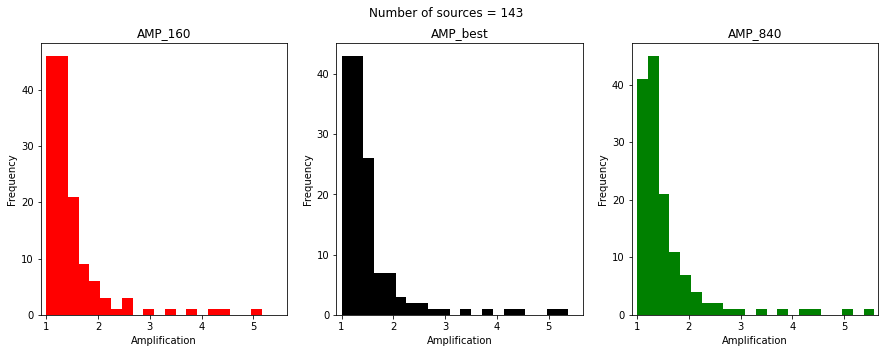

In [1862]:
bins = 24
xrange = (1,6)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

ax1.hist(a,bins=bins,color='red',label='AMP_160',range=xrange)
ax2.hist(b,bins=bins,color='black',label='AMP_best',range=xrange)
ax3.hist(c,bins=bins,color='green',label='AMP_840',range=xrange)

ax1.set_ylabel('Frequency')
ax1.set_xlabel('Amplification')
ax1.set_xlim(0.9,5.65)
ax1.set_title('AMP_160')
#ax1.legend()

ax2.set_ylabel('Frequency')
ax2.set_xlabel('Amplification')
ax2.set_xlim(0.9,5.65)
ax2.set_title('AMP_best')
#ax2.legend()

ax3.set_ylabel('Frequency')
ax3.set_xlabel('Amplification')
ax3.set_xlim(0.9,5.65)
ax3.set_title('AMP_840')
#ax3.legend()

fig.suptitle('Number of sources = %i'%(counter))

plt.savefig('/Users/brianmerino/Downloads/Magnification_Dist.png',facecolor='white', transparent=False)
plt.show()

#This plot can be included in the analysis section

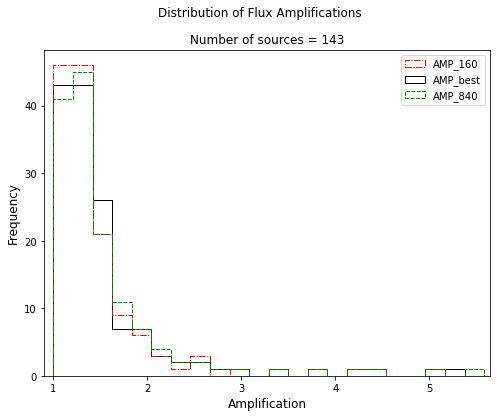

In [1863]:
#Whisker plot instead of what is shown above
bins = 24
xrange = (1,6)

fig,ax1 = plt.subplots(1,1,figsize=(8,6))

ax1.hist(a, bins=bins, color='red'  ,label='AMP_160' ,range=xrange, histtype='step',linestyle='-.',zorder=2)
ax1.hist(b, bins=bins, color='black',label='AMP_best',range=xrange, histtype='step',linestyle='-' ,zorder=1)
ax1.hist(c, bins=bins, color='green',label='AMP_840' ,range=xrange, histtype='step',linestyle='--',zorder=3)

ax1.set_ylabel('Frequency',fontsize=12)
ax1.set_xlabel('Amplification',fontsize=12)
ax1.set_xlim(0.9,5.65)
ax1.legend()

ax1.set_title('Number of sources = %i'%(counter))
fig.suptitle('Distribution of Flux Amplifications')

plt.savefig('/Users/brianmerino/Downloads/Magnification_Dist2.png',facecolor='white', transparent=False)
plt.show()

In [1870]:
#This will print out the galaxies that have an amplification over 2x
count =0
print('%8s \t %4s \t %6s'%('Cluster', 'id', 'Amp_best'))
for t in range(0,len(cat)):
    if cat['AMP_best'][t] > 2:
        print('%8s \t %4s \t %8s'%((cat['cluster'][t],cat['id'][t],cat['AMP_best'][t])))
        count+=1

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')      
print('Count: %s'%count)

 Cluster 	   id 	 Amp_best
    a383 	  799 	    4.168
    a383 	 1366 	   2.3455
    a383 	 1574 	   2.3611
    a611 	  769 	   5.3671
macs0416 	 1457 	   9.4353
macs1115 	  693 	    2.732
macs1149 	  352 	   6.9956
macs1206 	 1452 	   2.1307
macs1311 	  404 	   3.4364
macs1311 	  642 	    5.066
macs2129 	 1077 	   2.1008
 rxj1347 	  145 	   2.1351
 rxj1347 	  240 	   2.6646
 rxj1347 	  402 	   4.3909
 rxj1347 	  452 	   3.7827
 rxj1532 	  647 	   2.6509
 rxj1532 	  940 	   3.0449
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Count: 17
